Molecular Relaxations
===========

Rather than investigating relaxations as an average over all the molecules, we want to investigate individual molecules and how their behaviour is related to that of the aggregate. 

All the simulation data is from a set of simulations stored on RDS in the folder simulations/2017-09-09-dynamics. The set of simulation were all run at a pressure of 13.50 and the data analysed is collected from timesteps on an exponential scale. 

## Setup

This imports the modules nessecary for running the code in the rest of this notebook
while also setting up some helper functions to make the rest of the analysis simpler.

In [116]:
import sys

import pandas as pd
import numpy as np
import altair as alt

sys.path.append('../src')
from figures import use_my_theme
use_my_theme()

alt.data_transformers.enable('json');

### Import Data

This reads all the data from disk,
creating a pandas DataFrame and
a Holoviews Table for analysis and plotting of the data. 

In [3]:
data_file = "../data/analysis/dynamics.h5"

In [5]:
relaxations = pd.read_hdf(data_file, "relaxations")
relaxations = relaxations.query("pressure == 13.50")
relaxations['inv_temp'] = 1 / relaxations.temperature
relaxations['inv_diffusion'] = 1 / relaxations.diffusion_constant

In [117]:
long_relax = relaxations.drop(
    columns=['diffusion_constant']
).melt(
    id_vars=['temperature', 'pressure', 'inv_temp'], 
    var_name="Quantity"
)

# Drop invalid and abnormal values
mask = long_relax.value < 0
long_relax.value.values[mask] = np.nan
long_relax = long_relax.replace([np.inf, -np.inf], np.nan).dropna()

In [118]:
relax_chart = alt.Chart(long_relax).mark_point(filled=True, size=100).encode(
    alt.X('inv_temp', scale=alt.Scale(zero=False), axis=alt.Axis(title='1/T')),
    alt.Y('value', scale=alt.Scale(type='log'), axis=alt.Axis(format='e', title='')),
    alt.Color("Quantity")
)

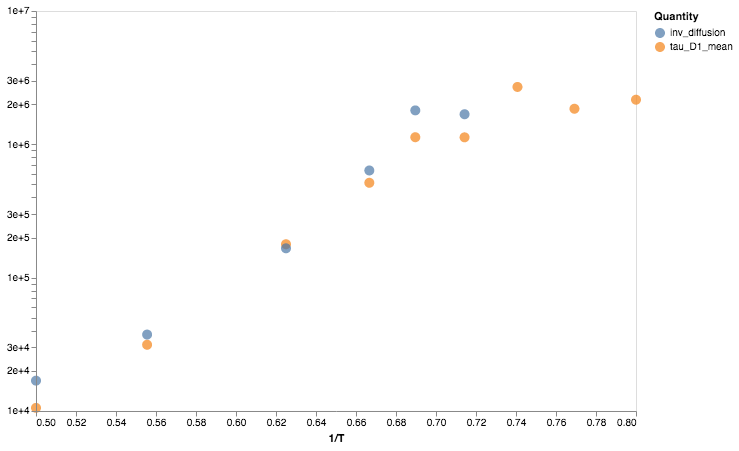

In [114]:
relax_chart.transform_filter(
    alt.FieldOneOfPredicate(field='Quantity', oneOf=["tau_D1_mean", "inv_diffusion"])
)

In [115]:
long_relax.Quantity.unique()

array(['tau_D1_mean', 'tau_D1_hmean', 'tau_D04_mean', 'tau_D04_hmean',
       'tau_DL04_mean', 'tau_DL04_hmean', 'tau_T2_mean', 'tau_T2_hmean',
       'tau_T3_mean', 'tau_T3_hmean', 'tau_T4_mean', 'tau_T4_hmean',
       'max_alpha_time', 'tau_F', 'max_gamma_time', 'tau_R1', 'tau_R2',
       'tau_S', 'inv_diffusion'], dtype=object)

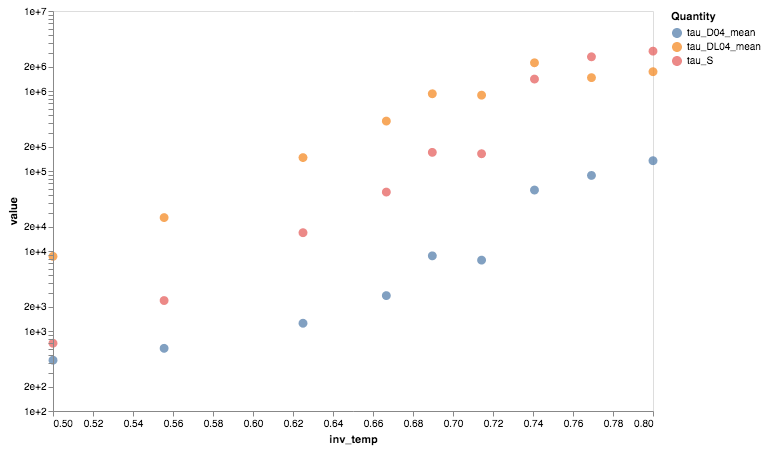

In [95]:
relax_chart.transform_filter(
    alt.FieldOneOfPredicate(field='Quantity', oneOf=["tau_D04_mean", "tau_DL04_mean", "tau_S"])
)

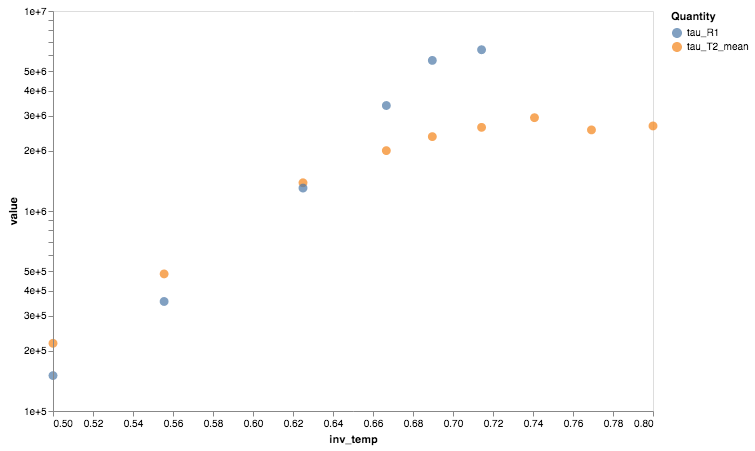

In [97]:
relax_chart.transform_filter(
    alt.FieldOneOfPredicate(field='Quantity', oneOf=["tau_R1", "tau_T2_mean"])
)

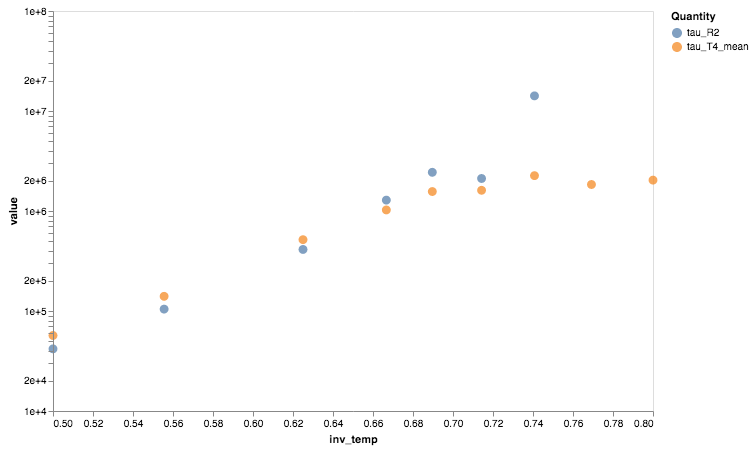

In [99]:
relax_chart.transform_filter(
    alt.FieldOneOfPredicate(field='Quantity', oneOf=["tau_R2", "tau_T4_mean"])
)

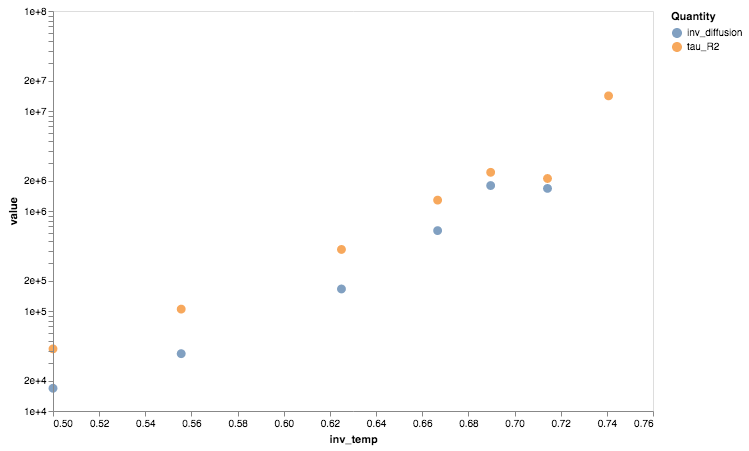

In [101]:
relax_chart.transform_filter(
    alt.FieldOneOfPredicate(field='Quantity', oneOf=["tau_R2", "inv_diffusion"])
)

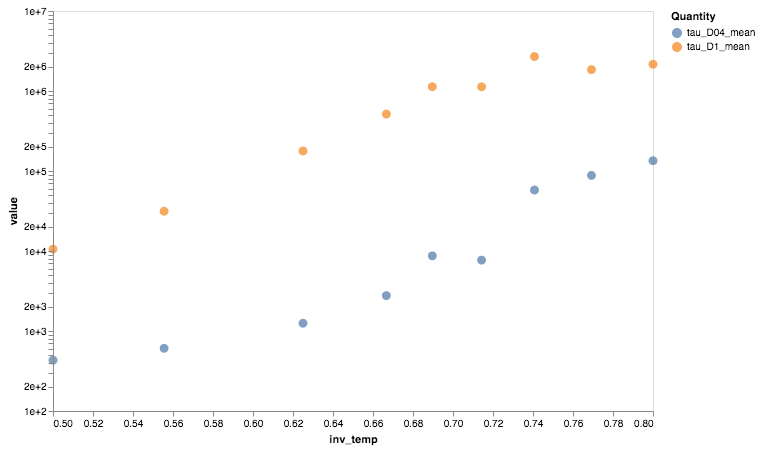

In [105]:
relax_chart.transform_filter(
    alt.FieldOneOfPredicate(field='Quantity', oneOf=["tau_D1_mean", "tau_D04_mean"])
)